## 데이터 틀

### 연도 컬럼 숫자는 수작업으로 수정 필요

In [22]:
## 데이터 불러오기
import pandas as pd
df = pd.read_excel('../data/경기신보/2023경매부동산.xlsx')

## 컬럼 이름 재설정 (연도 컬럼 숫자는 수작업으로 수정 필요)
df.columns = [
    "법원",
    "2019_강제",
    "2019_담보권실행",
    "2020_강제",
    "2020_담보권실행",
    "2021_강제",
    "2021_담보권실행",
    "2022_강제",
    "2022_담보권실행",
    "2023_강제",
    "2023_담보권실행",
    "평균_강제",
    "평균_담보권실행",
]

## 필요없는 행 삭제 (0행과 1행)
df = df.drop([0, 1]).reset_index(drop=True)

## 숫자 열 변환 (object -> int)
numeric_columns = df.columns[1:]  # 첫 번째 열(법원)은 제외
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

## 서울, 경기 지역은 따로 필터링하여 추출 (타 지역과 다르게 소계로 구할 수 없음)
# 서울 지역 합계
seoul_data = df[df["법원"].str.contains("서울중앙지방법원|서울동부지방법원|서울남부지방법원|서울북부지방법원|서울서부지방법원")]
seoul_totals = seoul_data.sum(numeric_only=True)
seoul_totals["법원"] = "서울"

# 경기 지역 합계
gyeonggi_data = df[df["법원"].str.contains("의정부지방법원|고양지원|남양주지원|부천지원|수원지방법원|성남지원|여주지원|평택지원|안산지원|안양지원")]
gyeonggi_totals = gyeonggi_data.sum(numeric_only=True)
gyeonggi_totals["법원"] = "경기"

# 기존 데이터에 서울, 경기 행 추가
df = pd.concat([df, pd.DataFrame([seoul_totals])], ignore_index=True)
df = pd.concat([df, pd.DataFrame([gyeonggi_totals])], ignore_index=True)

## 소계 행을 지역 이름으로 변경
region_names = ["강원", "대전/충남", "충북", "대구/경북", "부산", "울산", "경남", "광주/전남", "전북", "제주"]
for i, name in zip([25, 32, 37, 47, 51, 52, 59, 65, 70, 71], region_names):
    df.loc[i, "법원"] = name

## 총합 컬럼 추가 및 순서 재배치
# 연도 컬럼은 수작업으로 숫자 수정 필요
years = [2019, 2020, 2021, 2022, 2023]
for year in years:
    sum_column = f"{year}_총합"
    df[sum_column] = df[f"{year}_강제"] + df[f"{year}_담보권실행"]

columns_order = ["법원"]
for year in years:
    columns_order += [f"{year}_강제", f"{year}_담보권실행", f"{year}_총합"]
df = df[columns_order]

## 최종 지역별 데이터만 필터링
result_regions = ["서울", "경기", "인천", "강원", "대전/충남", "충북", "대구/경북", "부산", "울산", "경남", "광주/전남", "전북", "제주"]
result = df[df["법원"].isin(result_regions)].reset_index(drop=True)

## 최종 결과 출력
result

## 엑셀 파일로 저장
result.to_csv("../data/경기신보/result.csv", encoding="utf-8-sig", index=False)

### 년도 숫자만 바꾸면 다른 데이터도 돌아감

In [2]:
## 데이터 불러오기
import pandas as pd
df = pd.read_excel('../data/2022경매부동산.xlsx')

## 컬럼 이름 재설정 (연도 컬럼 숫자는 수작업으로 수정 필요)
df.columns = [
    "법원",
    "2018_강제",
    "2018_담보권실행",
    "2019_강제",
    "2019_담보권실행",
    "2020_강제",
    "2020_담보권실행",
    "2021_강제",
    "2021_담보권실행",
    "2022_강제",
    "2022_담보권실행",
    "평균_강제",
    "평균_담보권실행",
]

## 필요없는 행 삭제 (0행과 1행)
df = df.drop([0, 1]).reset_index(drop=True)

## 숫자 열 변환 (object -> int)
numeric_columns = df.columns[1:]  # 첫 번째 열(법원)은 제외
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

## 서울, 경기 지역은 따로 필터링하여 추출 (타 지역과 다르게 소계로 구할 수 없음)
# 서울 지역 합계
seoul_data = df[df["법원"].str.contains("서울중앙지방법원|서울동부지방법원|서울남부지방법원|서울북부지방법원|서울서부지방법원")]
seoul_totals = seoul_data.sum(numeric_only=True)
seoul_totals["법원"] = "서울"

# 경기 지역 합계
gyeonggi_data = df[df["법원"].str.contains("의정부지방법원|고양지원|남양주지원|부천지원|수원지방법원|성남지원|여주지원|평택지원|안산지원|안양지원")]
gyeonggi_totals = gyeonggi_data.sum(numeric_only=True)
gyeonggi_totals["법원"] = "경기"

# 기존 데이터에 서울, 경기 행 추가
df = pd.concat([df, pd.DataFrame([seoul_totals])], ignore_index=True)
df = pd.concat([df, pd.DataFrame([gyeonggi_totals])], ignore_index=True)

## 소계 행을 지역 이름으로 변경
region_names = ["강원", "대전/충남", "충북", "대구/경북", "부산", "울산", "경남", "광주/전남", "전북", "제주"]
for i, name in zip([25, 32, 37, 47, 51, 52, 59, 65, 70, 71], region_names):
    df.loc[i, "법원"] = name

## 총합 컬럼 추가 및 순서 재배치
# 연도 컬럼은 수작업으로 숫자 수정 필요
years = [2018, 2019, 2020, 2021, 2022]
for year in years:
    sum_column = f"{year}_총합"
    df[sum_column] = df[f"{year}_강제"] + df[f"{year}_담보권실행"]

columns_order = ["법원"]
for year in years:
    columns_order += [f"{year}_강제", f"{year}_담보권실행", f"{year}_총합"]
df = df[columns_order]

## 최종 지역별 데이터만 필터링
result_regions = ["서울", "경기", "인천", "강원", "대전/충남", "충북", "대구/경북", "부산", "울산", "경남", "광주/전남", "전북", "제주"]
result = df[df["법원"].isin(result_regions)].reset_index(drop=True)

## 최종 결과 출력
result

,법원,2018_강제,2018_담보권실행,2018_총합,2019_강제,2019_담보권실행,2019_총합,2020_강제,2020_담보권실행,2020_총합,2021_강제,2021_담보권실행,2021_총합,2022_강제,2022_담보권실행,2022_총합
0,강원,1360.0,1463.0,2823.0,1671.0,1733.0,3404.0,1489.0,1565.0,3054.0,1447.0,1193.0,2640.0,1305.0,1050.0,2355.0
1,대전/충남,2944.0,3847.0,6791.0,3434.0,4245.0,7679.0,3144.0,3476.0,6620.0,2955.0,2588.0,5543.0,2688.0,2558.0,5246.0
2,충북,1283.0,1624.0,2907.0,1573.0,1870.0,3443.0,1403.0,1575.0,2978.0,1307.0,1237.0,2544.0,1231.0,1145.0,2376.0
3,대구/경북,3017.0,3952.0,6969.0,3773.0,4887.0,8660.0,3343.0,4232.0,7575.0,3276.0,3191.0,6467.0,3502.0,2983.0,6485.0
4,부산,1727.0,2148.0,3875.0,1825.0,2861.0,4686.0,1933.0,2278.0,4211.0,1858.0,1535.0,3393.0,1741.0,1524.0,3265.0
5,울산,760.0,1382.0,2142.0,890.0,1904.0,2794.0,832.0,1564.0,2396.0,770.0,1065.0,1835.0,737.0,863.0,1600.0
6,경남,2507.0,4020.0,6527.0,3119.0,5451.0,8570.0,2843.0,4601.0,7444.0,2676.0,3155.0,5831.0,2486.0,2744.0,5230.0
7,광주/전남,3208.0,2345.0,5553.0,3821.0,2496.0,6317.0,3497.0,2121.0,5618.0,3095.0,1947.0,5042.0,2902.0,1740.0,4642.0
8,전북,1688.0,1720.0,3408.0,2035.0,2010.0,4045.0,1810.0,1704.0,3514.0,1716.0,1433.0,3149.0,1651.0,1194.0,2845.0
9,제주,602.0,451.0,1053.0,667.0,761.0,1428.0,691.0,898.0,1589.0,684.0,762.0,1446.0,654.0,731.0,1385.0


## 만들어진 데이터 틀 형식으로 그래프 작성

In [3]:
import pandas as pd
data = pd.read_csv('../data/result.csv')
data

,법원,2019_강제,2019_담보권실행,2019_총합,2020_강제,2020_담보권실행,2020_총합,2021_강제,2021_담보권실행,2021_총합,2022_강제,2022_담보권실행,2022_총합,2023_강제,2023_담보권실행,2023_총합
0,강원,1671.0,1733.0,3404.0,1489.0,1565.0,3054.0,1447.0,1193.0,2640.0,1305.0,1050.0,2355.0,1182.0,1554.0,2736.0
1,대전/충남,3434.0,4245.0,7679.0,3144.0,3476.0,6620.0,2955.0,2588.0,5543.0,2688.0,2558.0,5246.0,2693.0,4213.0,6906.0
2,충북,1573.0,1870.0,3443.0,1403.0,1575.0,2978.0,1307.0,1237.0,2544.0,1231.0,1145.0,2376.0,1128.0,1567.0,2695.0
3,대구/경북,3773.0,4887.0,8660.0,3343.0,4232.0,7575.0,3276.0,3191.0,6467.0,3502.0,2983.0,6485.0,2942.0,4927.0,7869.0
4,부산,1825.0,2861.0,4686.0,1933.0,2278.0,4211.0,1858.0,1535.0,3393.0,1741.0,1524.0,3265.0,1865.0,2804.0,4669.0
5,울산,890.0,1904.0,2794.0,832.0,1564.0,2396.0,770.0,1065.0,1835.0,737.0,863.0,1600.0,719.0,1563.0,2282.0
6,경남,3119.0,5451.0,8570.0,2843.0,4601.0,7444.0,2676.0,3155.0,5831.0,2486.0,2744.0,5230.0,2289.0,4267.0,6556.0
7,광주/전남,3821.0,2496.0,6317.0,3497.0,2121.0,5618.0,3095.0,1947.0,5042.0,2902.0,1740.0,4642.0,2722.0,2930.0,5652.0
8,전북,2035.0,2010.0,4045.0,1810.0,1704.0,3514.0,1716.0,1433.0,3149.0,1651.0,1194.0,2845.0,1535.0,1743.0,3278.0
9,제주,667.0,761.0,1428.0,691.0,898.0,1589.0,684.0,762.0,1446.0,654.0,731.0,1385.0,700.0,1485.0,2185.0


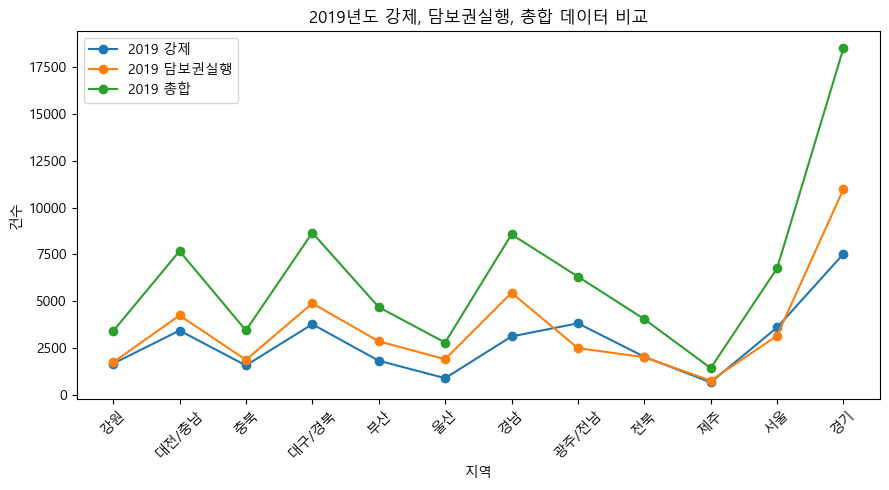

In [11]:
## 특정 해의 강제, 담보권, 종합 선 그래프 (x축: 지역, y축: 지역 법원 별 접수 건수)
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(9, 5))

categories = ['2019_강제', '2019_담보권실행', '2019_총합']
titles = ['2019년도 강제집행', '2019년도 담보권실행 집행', '2019년도 강제집행 및 담보권 실행 총합']
y_labels = ['2019 강제', '2019 담보권실행', '2019 총합']

# 각 카테고리에 대해 그래프 생성
for category, title, ylabel in zip(categories, titles, y_labels):
    plt.plot(data['법원'], data[category], marker='o', label=ylabel)

# 그래프 세부 설정
plt.xlabel('지역')
plt.ylabel('건수')
plt.title('2019년도 강제, 담보권실행, 총합 데이터 비교')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# 그래프 출력
plt.show()

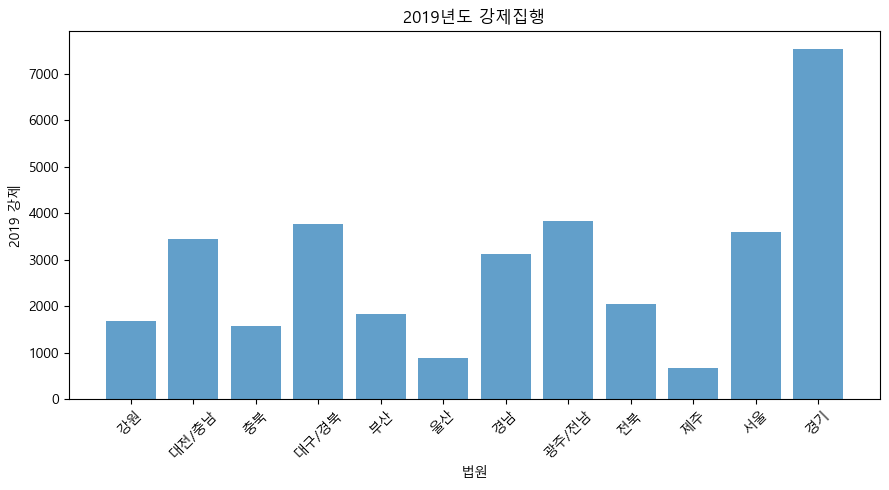

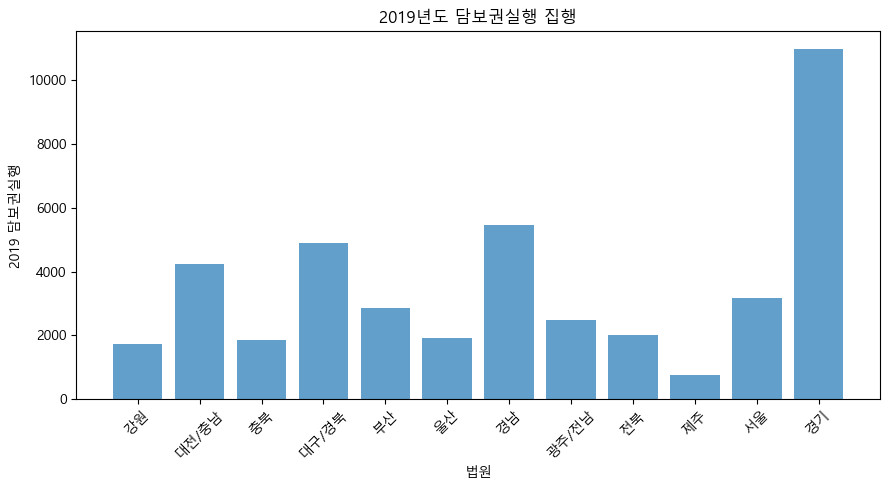

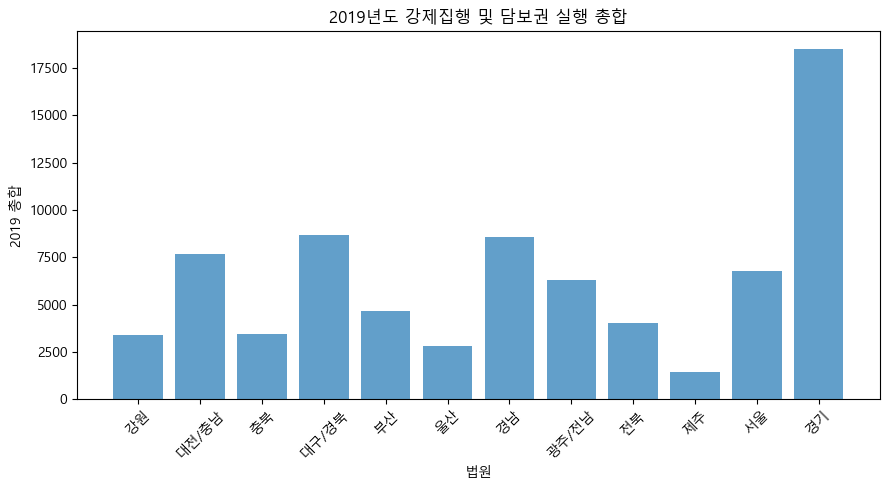

In [12]:
## 특정 해의 강제, 담보권, 종합 막대그래프

import matplotlib.pyplot as plt

# 데이터 준비
categories = ['2019_강제', '2019_담보권실행', '2019_총합']
titles = ['2019년도 강제집행', '2019년도 담보권실행 집행', '2019년도 강제집행 및 담보권 실행 총합']
y_labels = ['2019 강제', '2019 담보권실행', '2019 총합']

# 그래프 생성 및 출력
for category, title, ylabel in zip(categories, titles, y_labels):
    plt.figure(figsize=(9, 5))
    plt.bar(data['법원'], data[category], alpha=0.7)
    plt.xlabel('법원')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


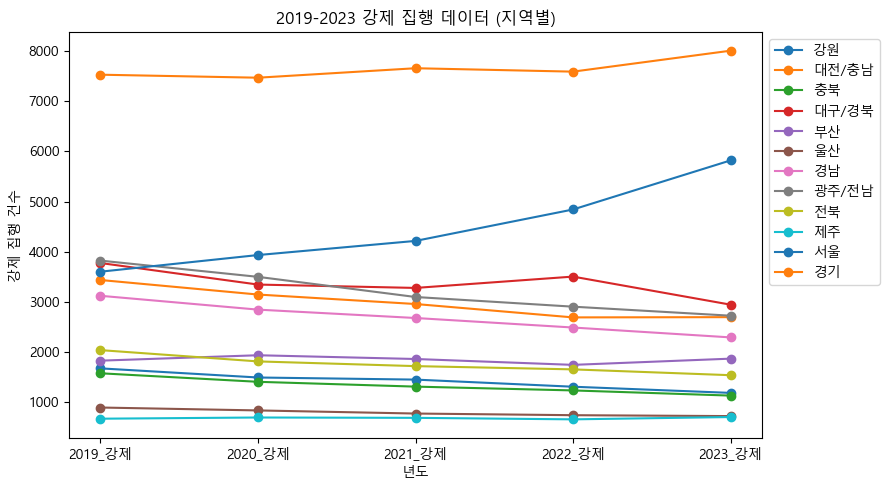

In [13]:
## 년도별 강제 집행 접수 건수 선 그래프 (x축: 년도, y축: 접수 건수)

# 강제 집행 데이터 (2019-2023) 선 그래프
years = ['2019_강제', '2020_강제', '2021_강제', '2022_강제', '2023_강제']

plt.figure(figsize=(9, 5))

# 각 법원별로 데이터 선 그래프 생성
for court in data['법원']:
    plt.plot(years, data[data['법원'] == court][years].values.flatten(), marker='o', label=court)

# 그래프 세부 설정
plt.xlabel('년도')
plt.ylabel('강제 집행 건수')
plt.title('2019-2023 강제 집행 데이터 (지역별)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# 그래프 출력
plt.show()

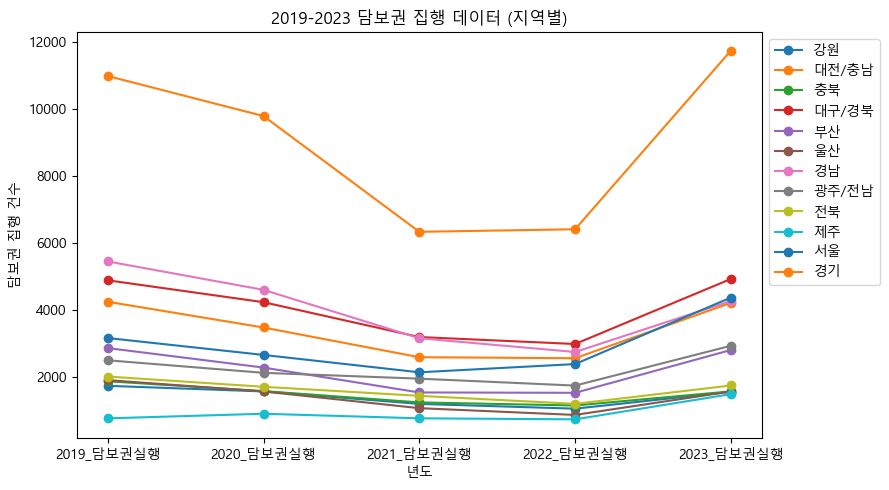

In [ ]:
# ## 년도별 강제 집행 접수 건수 선 그래프 (x축: 년도, y축: 접수 건수)

# # 강제 집행 데이터 (2019-2023) 선 그래프
# years = ['2019_담보권실행', '2020_담보권실행', '2021_담보권실행', '2022_담보권실행', '2023_담보권실행']

# plt.figure(figsize=(9, 5))

# # 각 법원별로 데이터 선 그래프 생성
# for court in data['법원']:
#     plt.plot(years, data[data['법원'] == court][years].values.flatten(), marker='o', label=court)

# # 그래프 세부 설정
# plt.xlabel('년도')
# plt.ylabel('담보권 집행 건수')
# plt.title('2019-2023 담보권 집행 데이터 (지역별)')
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# plt.tight_layout()

# # 그래프 출력
# plt.show()

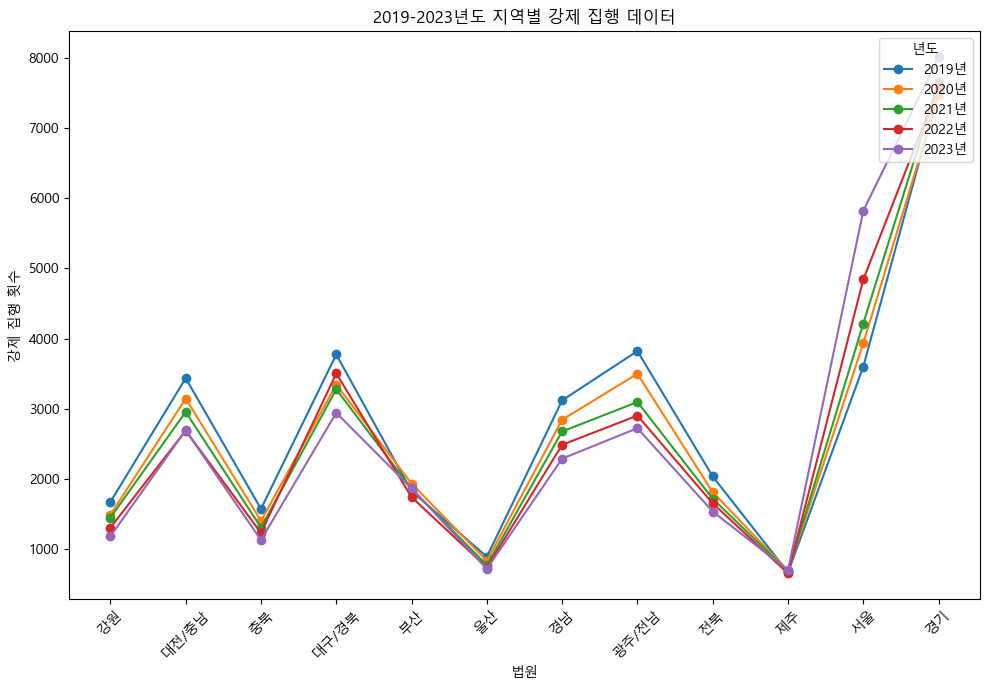

In [17]:
# 지역을 기준으로 2019-2023년 강제 집행 데이터를 하나의 그래프에 표시
plt.figure(figsize=(10, 7))

# 연도별 데이터 리스트
years = ['2019_강제', '2020_강제', '2021_강제', '2022_강제', '2023_강제']
labels = ['2019', '2020', '2021', '2022', '2023']

# 각 연도에 대해 그래프 생성
for year, label in zip(years, labels):
    plt.plot(data['법원'], data[year], marker='o', label=f'{label}년')

# 그래프 세부 설정
plt.xlabel('법원')
plt.ylabel('강제 집행 횟수')
plt.title('2019-2023년도 지역별 강제 집행 데이터')
plt.xticks(rotation=45)
plt.legend(title='년도', loc='upper right')
plt.tight_layout()

# 그래프 출력
plt.show()
